## Scale Magnitude Transform for genre/rythmic pattern classification


In [ ]:
import sys
import os
parent_dir = os.path.abspath(os.path.join('..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
%load_ext autoreload
%autoreload 2

from scripts.data_loaders import load_ballroom_dataset, load_cretan_dances_dataset

from collections import Counter
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from tqdm import tqdm
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

## Ballroom Dataset


In [ ]:
# define parameters to compute scale transform magnitude
stm_params = {"mel_flag" : False, "with_padding" : False, "n_mels" : 50, "autocor_window_type" : "rectangular", "num_stm_coefs" : 150}

In [13]:
features_ballroom, labels_ballroom, _ = load_ballroom_dataset(stm_params=stm_params)

Processing folder: Samba
Processing folder: Rumba-Misc
Processing folder: Tango
Processing folder: VienneseWaltz
Processing folder: Quickstep
Processing folder: Waltz
Processing folder: Rumba-American
Processing folder: nada
Processing folder: ChaChaCha
Processing folder: Rumba-International
Processing folder: Jive
Features shape: 698 -- labels shape: 698


Mean CV Accuracy: 0.7277936962750716


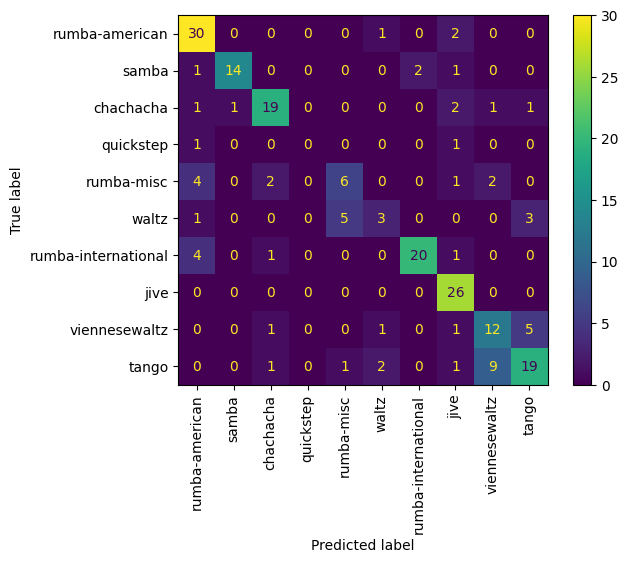

In [15]:
encoded_labels_ballroom = LabelEncoder().fit_transform(labels_ballroom)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(features_ballroom), encoded_labels_ballroom, test_size=0.3, stratify=encoded_labels_ballroom, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=7, metric="cosine")

loo = LeaveOneOut()
cv_scores = cross_val_score(knn, features_ballroom, encoded_labels_ballroom, cv=loo, scoring="accuracy")

print("Mean CV Accuracy:", cv_scores.mean())

knn = KNeighborsClassifier(metric="cosine").fit(X=x_train, y=y_train)

ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=set(labels_ballroom))
plt.xticks(rotation=90)
plt.show()

## GridSearch CV on Ballroom


In [ ]:
# Define a grid of parameters to search over
param_grid = {
    "n_mels": [50, 75, 100],  # Example values for n_mels
    "auto_cor_lag_seconds": [5, 8, 13],  # Example values for auto_cor_lag_seconds
    "stm_coefs": [i for i in range(30, 400, 30)],
}

best_score = -1
best_params = None

# Iterate over all combinations of parameters
for n_mels in param_grid["n_mels"]:
    for auto_cor_lag_seconds in param_grid["auto_cor_lag_seconds"]:
        for stm_coefs in param_grid["stm_coefs"]:
            print("n_mels:", n_mels, "auto_cor_lag_seconds:", auto_cor_lag_seconds, "stm_coefs:", stm_coefs)
            # Compute features with current parameters
            features = []
            labels = []
            for _, track in tqdm(ballroom_dataset.load_tracks().items()):
                y, sr = librosa.load(track.audio_path, sr=8000)
                features.append(
                    stm.compute_stm(
                        y=y,
                        sr=sr,
                        win_size=160,
                        hop=80,
                        n_mels=n_mels,
                        auto_cor_lag_seconds=auto_cor_lag_seconds,
                    )[:stm_coefs]
                )
                labels.append(track.genre)

            # Encode labels
            encoded_labels = LabelEncoder().fit_transform(labels)

            # Initialize and evaluate the classifier
            knn = KNeighborsClassifier(n_neighbors=7, metric="cosine")
            loo = LeaveOneOut()
            cv_scores = cross_val_score(knn, features, labels, cv=loo, scoring="accuracy")
            mean_cv_score = cv_scores.mean()
            print("Mean CV Accuracy:", mean_cv_score)

            # Update best score and parameters if needed
            if mean_cv_score > best_score:
                best_score = mean_cv_score
                best_params = {"n_mels": n_mels, "auto_cor_lag_seconds": auto_cor_lag_seconds}

# Output the best parameters and score
print("Best Parameters:", best_params)
print("Best Mean CV Accuracy:", best_score)

## Greek/Cretan Dances Dataset


In [ ]:
# define parameters to compute scale transform magnitude
stm_params = {"mel_flag" : False, "with_padding" : False, "n_mels" : 50, "autocor_window_type" : "rectangular", "num_stm_coefs" : 150}

In [2]:
features_cretan, labels_cretan, _ = load_cretan_dances_dataset(stm_params=stm_params)

NameError: name 'load_cretan_dances_dataset' is not defined

Mean CV Accuracy: 0.4692737430167598


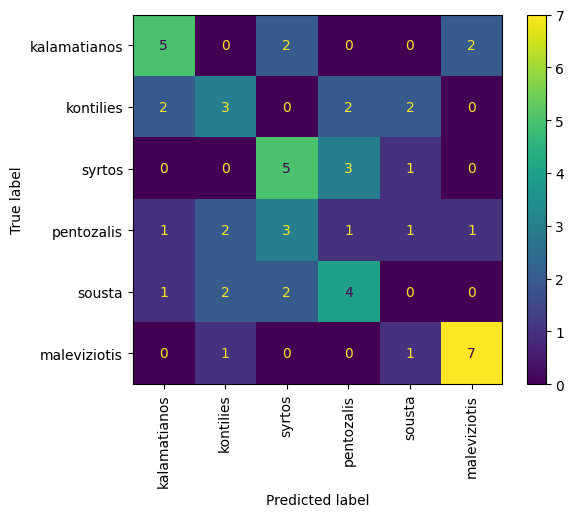

In [12]:
encoded_labels_cretan = LabelEncoder().fit_transform(labels_cretan)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(features_cretan), encoded_labels_cretan, test_size=0.3, stratify=encoded_labels_cretan, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=7, metric="cosine")

loo = LeaveOneOut()
cv_scores = cross_val_score(knn, features_cretan, encoded_labels_cretan, cv=loo, scoring="accuracy")
print("Mean CV Accuracy:", cv_scores.mean())

knn = KNeighborsClassifier(n_neighbors=7, metric="cosine").fit(X=x_train, y=y_train)
ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, display_labels=set(labels_cretan))
plt.xticks(rotation=90)
plt.show()

## GridSearch CV on GreekDances


In [ ]:
cretan_dances_data_path = Path("../datasets/CretanDances")

# Define a grid of parameters to search over
param_grid = {
    "n_mels": [50, 75, 100],  # Example values for n_mels
    "auto_cor_lag_seconds": [5, 8, 13],  # Example values for auto_cor_lag_seconds
    "stm_coefs": [i for i in range(30, 400, 30)],
}

best_score = -1
best_params = None

# Iterate over all combinations of parameters
for n_mels in param_grid["n_mels"]:
    for auto_cor_lag_seconds in param_grid["auto_cor_lag_seconds"]:
        for stm_coefs in param_grid["stm_coefs"]:
            print("n_mels:", n_mels, "auto_cor_lag_seconds:", auto_cor_lag_seconds, "stm_coefs:", stm_coefs)
            # Compute features with current parameters
            features = []
            labels = []
            for subfolder in cretan_dances_data_path.iterdir():
                if subfolder.is_dir():
                    label = subfolder.name
                    print(label)
                    for audio_file in subfolder.glob("*.wav"):
                        y, sr = librosa.load(audio_file, sr=8000)
                        features.append(
                            stm.compute_stm(
                                y=y,
                                sr=sr,
                                win_size=160,
                                hop=80,
                                n_mels=n_mels,
                                auto_cor_lag_seconds=auto_cor_lag_seconds,
                            )[:stm_coefs]
                        )
                        labels.append(label)

            # Encode labels
            encoded_labels = LabelEncoder().fit_transform(labels)

            # Initialize and evaluate the classifier
            knn = KNeighborsClassifier(n_neighbors=7, metric="cosine")
            loo = LeaveOneOut()
            cv_scores = cross_val_score(knn, features, labels, cv=loo, scoring="accuracy")
            mean_cv_score = cv_scores.mean()
            print("Mean CV Accuracy:", mean_cv_score)

            # Update best score and parameters if needed
            if mean_cv_score > best_score:
                best_score = mean_cv_score
                best_params = {"n_mels": n_mels, "auto_cor_lag_seconds": auto_cor_lag_seconds}

# Output the best parameters and score
print("Best Parameters:", best_params)
print("Best Mean CV Accuracy:", best_score)